In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import joblib
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')

In [2]:
car_dataset = pd.read_csv('car_data.csv')

In [3]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car_dataset.shape

(301, 9)

In [5]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
car_dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
print('\nFuel Type:')
print(car_dataset['Fuel_Type'].value_counts())
print('\nSeller Type:')
print(car_dataset['Seller_Type'].value_counts())
print('\nTransmission:')
print(car_dataset['Transmission'].value_counts())
print('\nOwner:')
print(car_dataset['Owner'].value_counts())


Fuel Type:
Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

Seller Type:
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

Transmission:
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

Owner:
Owner
0    290
1     10
3      1
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution of Car Selling Prices')

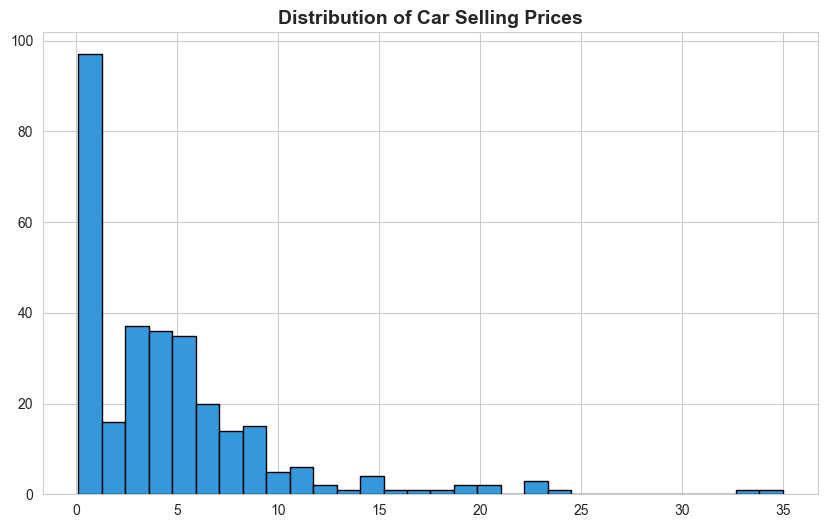

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(car_dataset['Selling_Price'], bins=30, color='#3498db', edgecolor='black')
plt.title('Distribution of Car Selling Prices', fontsize=14, fontweight='bold')

Text(0.5, 1.0, 'Feature Correlation Heatmap')

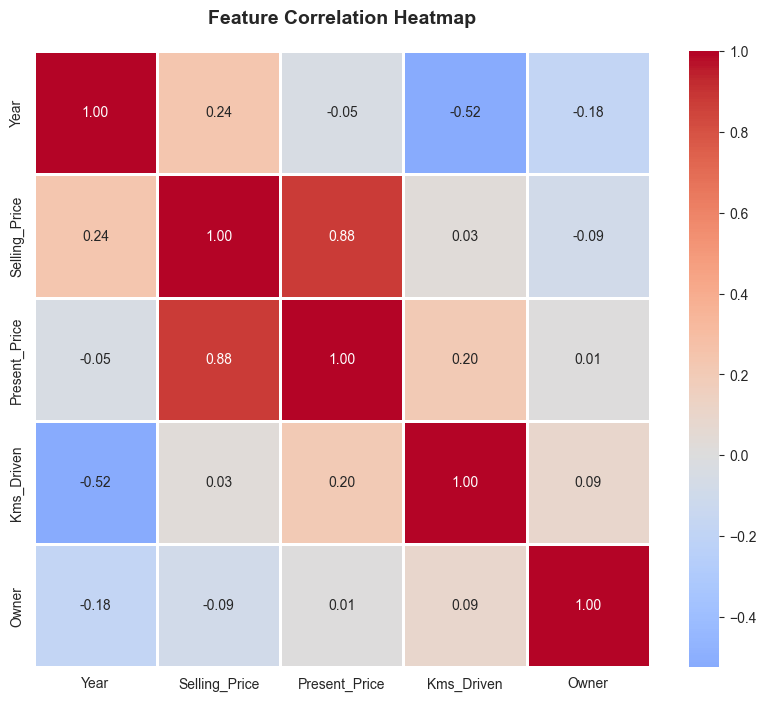

In [10]:
plt.figure(figsize=(10 , 8))
numeric_data = car_dataset.select_dtypes(include=[np.number])
correlation = numeric_data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, square=True, linewidths=1, fmt='.2f')
plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold', pad=20)

Text(0, 0.5, 'Selling Price (Lakhs)')

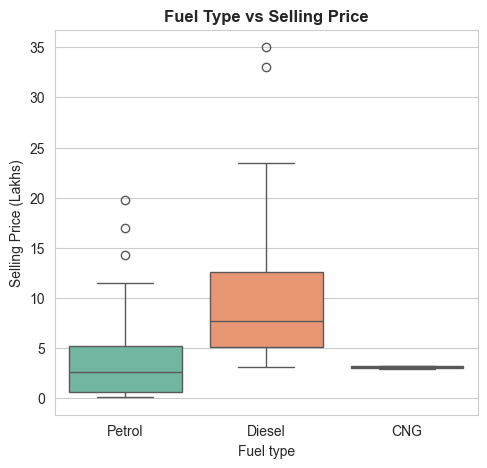

In [11]:
#Fuel type vs Selling Price
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=car_dataset, palette='Set2')
plt.title('Fuel Type vs Selling Price', fontweight='bold')
plt.xlabel('Fuel type')
plt.ylabel('Selling Price (Lakhs)')

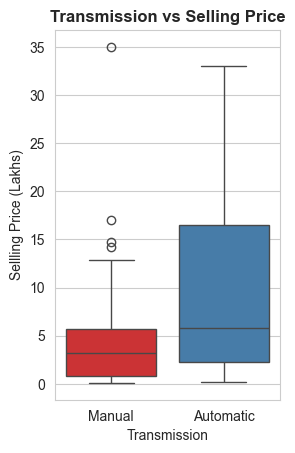

In [12]:
#Transmission vs Selling Price
plt.subplot(1,2,2)
sns.boxplot(x='Transmission', y='Selling_Price',data=car_dataset, palette='Set1')
plt.title('Transmission vs Selling Price', fontweight='bold')
plt.xlabel('Transmission')
plt.ylabel('Sellling Price (Lakhs)')
plt.show()

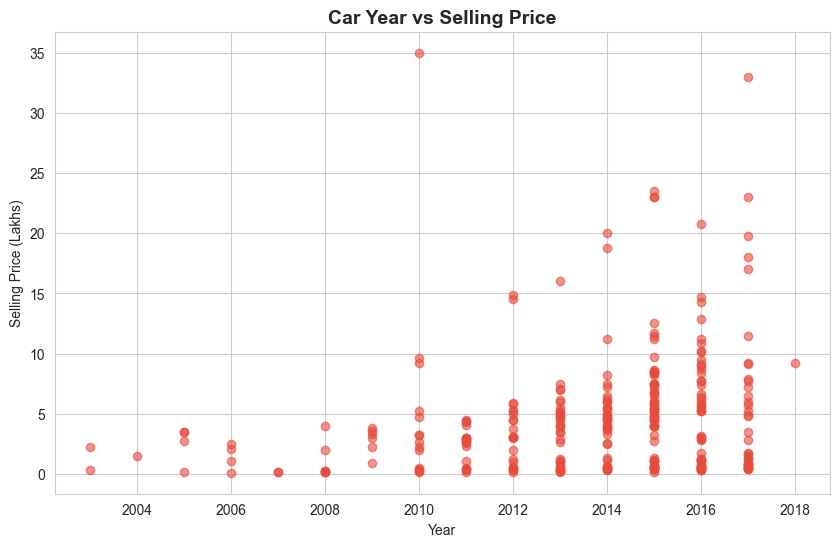

In [13]:
#Year vs Selling Price
plt.figure(figsize=(10,6))
plt.scatter(car_dataset['Year'], car_dataset['Selling_Price'], alpha=0.6, c='#e74c3c')
plt.title('Car Year vs Selling Price', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Selling Price (Lakhs)')
plt.show()

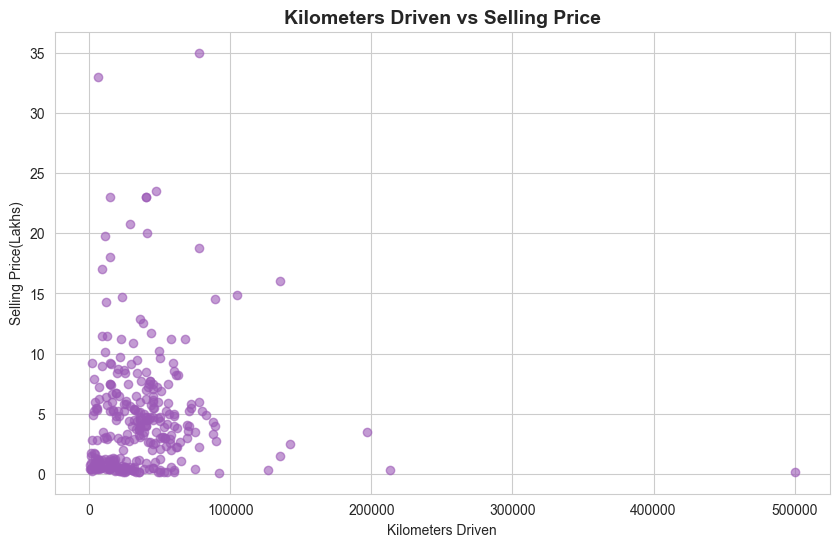

In [14]:
#Kms driven vs Selling Price
plt.figure(figsize=(10,6))
plt.scatter(car_dataset['Kms_Driven'], car_dataset['Selling_Price'], alpha=0.6, c='#9b59b6')
plt.title('Kilometers Driven vs Selling Price',fontsize=14, fontweight='bold')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price(Lakhs)')
plt.show()

In [15]:
#Encoding 
car_dataset.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)
car_dataset.replace({'Seller_Type': {'Dealer':0, 'Individual':1}}, inplace= True)
car_dataset.replace({'Transmission': {'Manual':0, 'Automatic':1}}, inplace=True)
print("Encoded Dataset")
car_dataset.head()

Encoded Dataset


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [16]:
x = car_dataset.drop(['Car_Name', 'Selling_Price'], axis=1)

In [17]:
y=car_dataset['Selling_Price']
print(x.head)

<bound method NDFrame.head of      Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1      

In [19]:
print(y.head())

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64


In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
print(f'Training Sample: {x_train.shape[0]} (80%)')

Training Sample: 240 (80%)


In [21]:
print(f'Testing Sample: {x_test.shape[0]} (20%)')

Testing Sample: 61 (20%)


In [22]:
#Model 1 Linear Regression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

train_pred_lr = lin_reg.predict(x_train)
train_r2_lr = metrics.r2_score(y_train, train_pred_lr)
train_mae_lr = metrics.mean_absolute_error(y_train, train_pred_lr)
train_rmse_lr = np.sqrt(metrics.mean_squared_error(y_train, train_pred_lr))

print('r2 score', train_r2_lr)
print('mae', train_mae_lr)
print('rmse', train_rmse_lr)

r2 score 0.88381691937098
mae 1.1998520242147033
rmse 1.790901267840887


In [23]:
test_pred_lr = lin_reg.predict(x_test)
test_r2_lr = metrics.r2_score(y_test, test_pred_lr)
test_mae_lr = metrics.mean_absolute_error(y_test, test_pred_lr)
test_rmse_lr = np.sqrt(metrics.mean_squared_error(y_test, test_pred_lr))

print('r2 score', test_r2_lr)
print('mae', test_mae_lr)
print('rmse',test_rmse_lr)

r2 score 0.8401532365377967
mae 1.2671998472916814
rmse 1.713424474242196


Text(0.5, 1.0, 'Linear Regression - Testing')

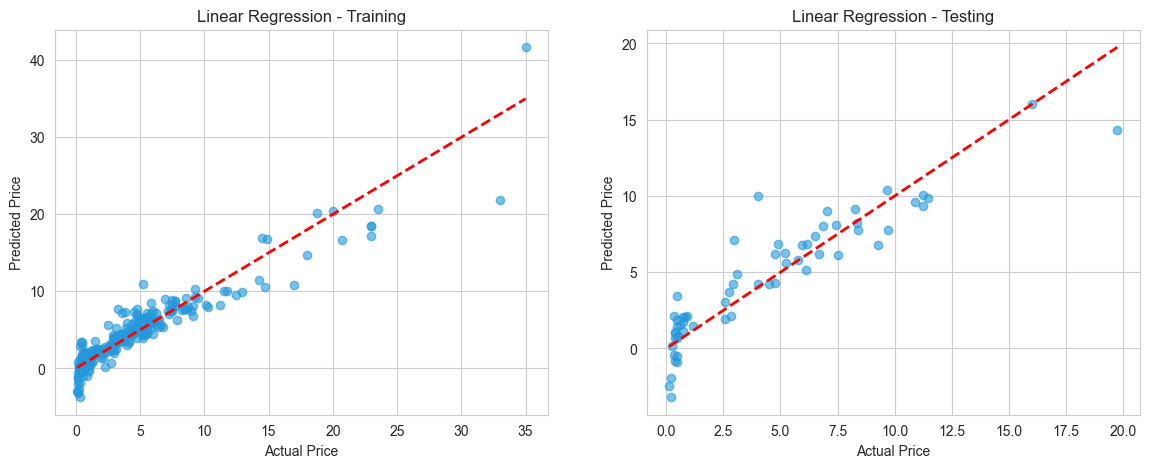

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(y_train, train_pred_lr, alpha=0.6, color='#2498db')
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Price')
axes[0].set_ylabel('Predicted Price')
axes[0].set_title('Linear Regression - Training')

axes[1].scatter(y_test, test_pred_lr, alpha=0.6, color='#2498db')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual Price')
axes[1].set_ylabel('Predicted Price')
axes[1].set_title('Linear Regression - Testing')

In [36]:
#Model 2 Lasso regresion

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(x_train, y_train)

train_pred_lasso = lasso_reg.predict(x_train)
train_r2_score = metrics.r2_score(y_train, train_pred_lasso)
train_mae_lasso = metrics.mean_absolute_error(y_train, train_pred_lasso)
train_rmse_lasso = np.sqrt(metrics.mean_squared_error(y_train, train_pred_lasso))

print('r2 score', train_r2_score)
print('mae', train_mae_lasso)
print('rmse',train_rmse_lasso)

r2 score 0.8736452471129413
mae 1.1920859027644937
rmse 1.867652146892218


In [37]:
test_pred_lasso = lasso_reg.predict(x_test)
test_r2_score = metrics.r2_score(y_test, test_pred_lasso)
test_mae_lasso = metrics.mean_absolute_error(y_test, test_pred_lasso)
test_rmse_lasso = np.sqrt(metrics.mean_squared_error(y_test, test_pred_lasso))

print('r2 score', test_r2_score)
print('mae', test_mae_lasso)
print('rmse',test_rmse_lasso)

r2 score 0.8578767759929422
mae 1.2038465262647073
rmse 1.615643611741501


Text(0.5, 1.0, 'Lasso Regression - Testing')

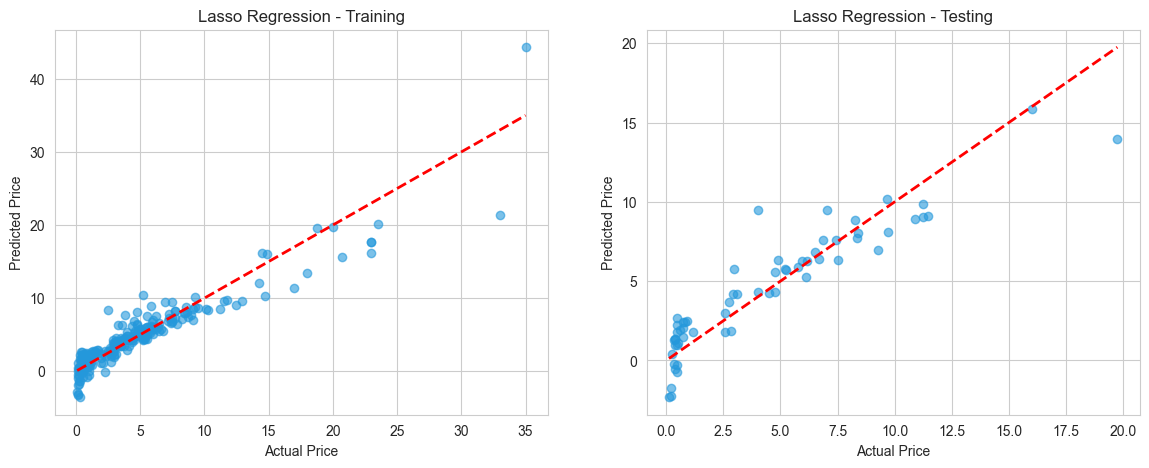

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(y_train, train_pred_lasso, alpha=0.6, color='#2498db')
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Price')
axes[0].set_ylabel('Predicted Price')
axes[0].set_title('Lasso Regression - Training')

axes[1].scatter(y_test, test_pred_lasso, alpha=0.6, color='#2498db')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual Price')
axes[1].set_ylabel('Predicted Price')
axes[1].set_title('Lasso Regression - Testing')

In [39]:
#model 3 Random Forest
rf_reg = RandomForestRegressor(n_estimators=100, random_state=2)
rf_reg.fit(x_train, y_train)

train_pred_rf = rf_reg.predict(x_train)
train_r2_rf = metrics.r2_score(y_train, train_pred_rf)
train_mae_rf = metrics.mean_absolute_error(y_train, train_pred_rf)
train_rmse_rf = np.sqrt(metrics.mean_squared_error(y_train, train_pred_rf))

print('r2 score', train_r2_rf)
print('mae', train_mae_rf)
print('rmse', train_rmse_rf)

r2 score 0.9866385984957081
mae 0.24567583333333323
rmse 0.6073320599145082


In [40]:
test_pred_rf = rf_reg.predict(x_test)
test_r2_rf = metrics.r2_score(y_test, test_pred_rf)
test_mae_rf = metrics.mean_absolute_error(y_test, test_pred_rf)
test_rmse_rf = np.sqrt(metrics.mean_squared_error(y_test, test_pred_rf))

print('r2 score', test_r2_rf)
print('mae', test_mae_rf)
print('rmse', test_rmse_rf)

r2 score 0.9590809394712362
mae 0.48607049180327894
rmse 0.8669137063527695


In [41]:
feature_importance = pd.DataFrame({
    'Feature': x.columns,
    'Importance': rf_reg.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance)

         Feature  Importance
1  Present_Price    0.884258
0           Year    0.082813
2     Kms_Driven    0.020214
4    Seller_Type    0.004705
3      Fuel_Type    0.004537
5   Transmission    0.003125
6          Owner    0.000348


Text(0.5, 1.0, ' Random Forest - Testing')

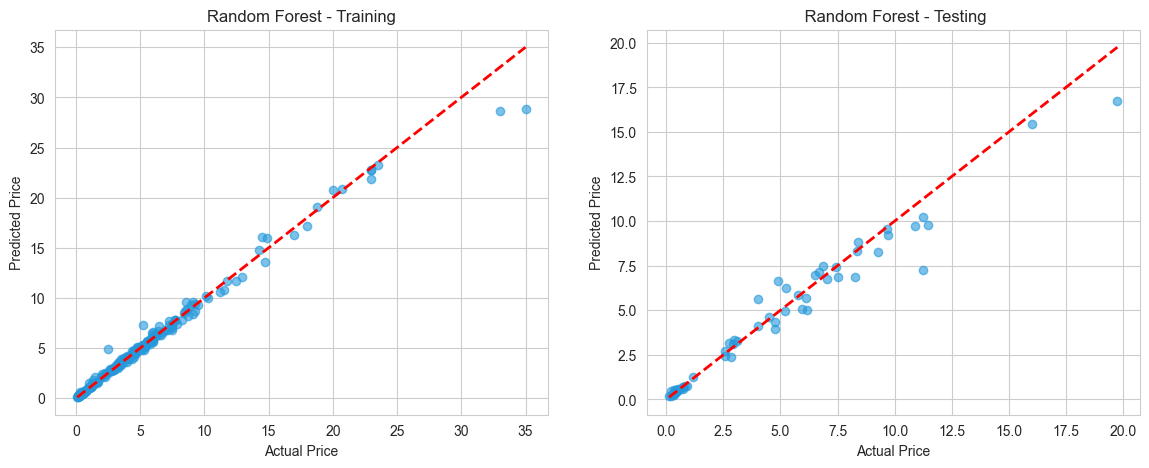

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(y_train, train_pred_rf, alpha=0.6, color='#2498db')
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Price')
axes[0].set_ylabel('Predicted Price')
axes[0].set_title('Random Forest - Training')

axes[1].scatter(y_test, test_pred_rf, alpha=0.6, color='#2498db')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual Price')
axes[1].set_ylabel('Predicted Price')
axes[1].set_title(' Random Forest - Testing')

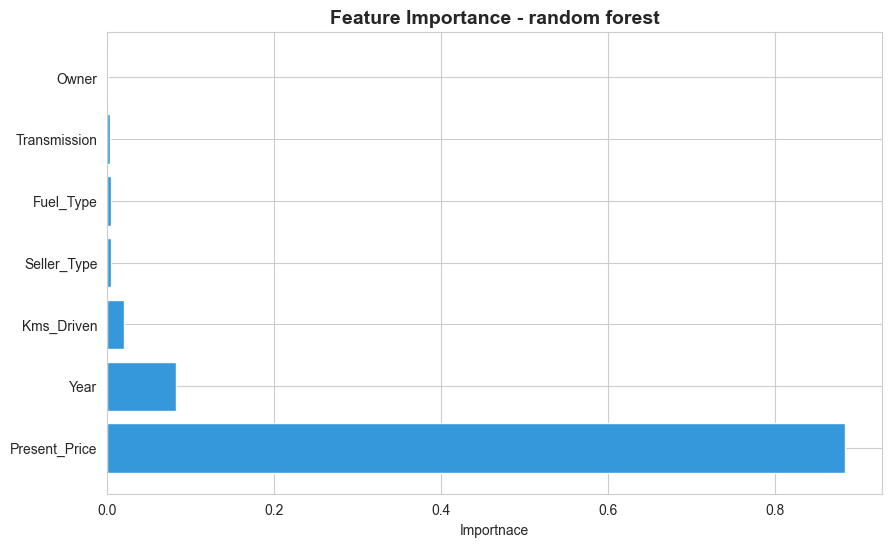

In [43]:
plt.figure(figsize=(10,6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color ='#3498db')
plt.xlabel('Importnace')
plt.title('Feature Importance - random forest', fontsize=14, fontweight='bold')
plt.show()

In [44]:
#Model Comparison

print('Linear Regression', test_r2_lr)
print('Lasso Regression',test_r2_score)
print('Random Forest', test_r2_rf)

Linear Regression 0.8401532365377967
Lasso Regression 0.8578767759929422
Random Forest 0.9590809394712362


In [45]:
#Save Best Model
joblib.dump(rf_reg, 'car_prediction_model.pkl')

['car_prediction_model.pkl']

In [46]:
input_data = pd.DataFrame({
    'Year': [2015],
    'Present_Price': [7.0],
    'Kms_Driven': [50000],
    'Fuel_Type':[0],
    'Seller_Type':[1],
    'Transmission': [0],
    'Owner': [1]
})

prediction = rf_reg.predict(input_data)[0]
print(prediction)

4.187500000000001
